In [1]:
#1
import sqlite3

conn = sqlite3.connect('student_grades.db')

cursor = conn.cursor()


In [2]:
#2
create_students_table = """
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
);
"""

create_grades_table = """
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER NOT NULL,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
);
"""

cursor.execute(create_students_table)
cursor.execute(create_grades_table)

conn.commit()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print(tables)

[('students',), ('sqlite_sequence',), ('grades',)]


In [3]:
#3
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]

grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 90),
    (3, 'English', 92),
    (3, 'History', 89),
    (4, 'Math', 78),
    (4, 'English', 84),
    (4, 'History', 80),
    (5, 'Math', 94),
    (5, 'English', 90),
    (5, 'History', 93)
]

insert_students_query = "INSERT INTO students (first_name, last_name) VALUES (?, ?)"
cursor.executemany(insert_students_query, students_data)

insert_grades_query = "INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)"
cursor.executemany(insert_grades_query, grades_data)

conn.commit()

cursor.execute("SELECT * FROM students")
students_result = cursor.fetchall()

cursor.execute("SELECT * FROM grades")
grades_result = cursor.fetchall()

print(students_result)
print(grades_result)

[(1, 'Alice', 'Johnson'), (2, 'Bob', 'Smith'), (3, 'Carol', 'White'), (4, 'David', 'Brown'), (5, 'Eve', 'Davis'), (6, 'Alice', 'Johnson'), (7, 'Bob', 'Smith'), (8, 'Carol', 'White'), (9, 'David', 'Brown'), (10, 'Eve', 'Davis'), (11, 'Alice', 'Johnson'), (12, 'Bob', 'Smith'), (13, 'Carol', 'White'), (14, 'David', 'Brown'), (15, 'Eve', 'Davis')]
[(1, 1, 'Math', 95), (2, 1, 'English', 88), (3, 1, 'History', 90), (4, 2, 'Math', 82), (5, 2, 'English', 76), (6, 2, 'History', 85), (7, 3, 'Math', 90), (8, 3, 'English', 92), (9, 3, 'History', 89), (10, 4, 'Math', 78), (11, 4, 'English', 84), (12, 4, 'History', 80), (13, 5, 'Math', 94), (14, 5, 'English', 90), (15, 5, 'History', 93), (16, 1, 'Math', 95), (17, 1, 'English', 88), (18, 1, 'History', 90), (19, 2, 'Math', 82), (20, 2, 'English', 76), (21, 2, 'History', 85), (22, 3, 'Math', 90), (23, 3, 'English', 92), (24, 3, 'History', 89), (25, 4, 'Math', 78), (26, 4, 'English', 84), (27, 4, 'History', 80), (28, 5, 'Math', 94), (29, 5, 'English', 9

In [4]:
#4
query_1 = """
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id;
"""
cursor.execute(query_1)
result_1 = cursor.fetchall()

query_2 = """
SELECT students.first_name, students.last_name, AVG(grades.grade) as avg_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id;
"""
cursor.execute(query_2)
result_2 = cursor.fetchall()

query_3 = """
SELECT students.first_name, students.last_name, AVG(grades.grade) as avg_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY students.student_id
ORDER BY avg_grade DESC
LIMIT 1;
"""
cursor.execute(query_3)
result_3 = cursor.fetchall()

query_4 = """
SELECT AVG(grade) as avg_math_grade
FROM grades
WHERE subject = 'Math';
"""
cursor.execute(query_4)
result_4 = cursor.fetchall()

query_5 = """
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
WHERE grades.grade > 90;
"""
cursor.execute(query_5)
result_5 = cursor.fetchall()

print(result_1)
print(result_2)
print(result_3)
print(result_4)
print(result_5)


[('Alice', 'Johnson', 'Math', 95), ('Alice', 'Johnson', 'English', 88), ('Alice', 'Johnson', 'History', 90), ('Bob', 'Smith', 'Math', 82), ('Bob', 'Smith', 'English', 76), ('Bob', 'Smith', 'History', 85), ('Carol', 'White', 'Math', 90), ('Carol', 'White', 'English', 92), ('Carol', 'White', 'History', 89), ('David', 'Brown', 'Math', 78), ('David', 'Brown', 'English', 84), ('David', 'Brown', 'History', 80), ('Eve', 'Davis', 'Math', 94), ('Eve', 'Davis', 'English', 90), ('Eve', 'Davis', 'History', 93), ('Alice', 'Johnson', 'Math', 95), ('Alice', 'Johnson', 'English', 88), ('Alice', 'Johnson', 'History', 90), ('Bob', 'Smith', 'Math', 82), ('Bob', 'Smith', 'English', 76), ('Bob', 'Smith', 'History', 85), ('Carol', 'White', 'Math', 90), ('Carol', 'White', 'English', 92), ('Carol', 'White', 'History', 89), ('David', 'Brown', 'Math', 78), ('David', 'Brown', 'English', 84), ('David', 'Brown', 'History', 80), ('Eve', 'Davis', 'Math', 94), ('Eve', 'Davis', 'English', 90), ('Eve', 'Davis', 'Histor

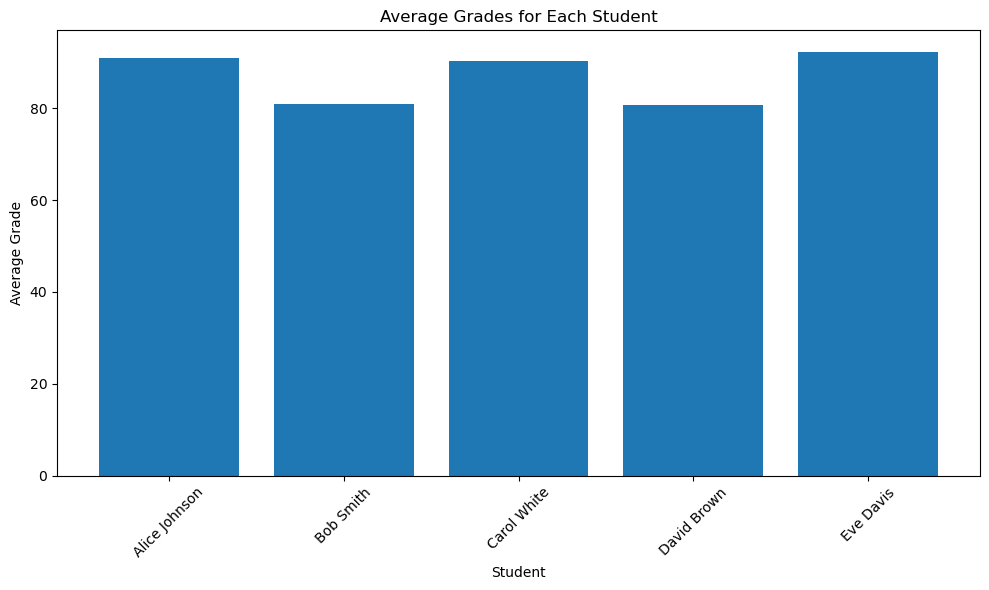

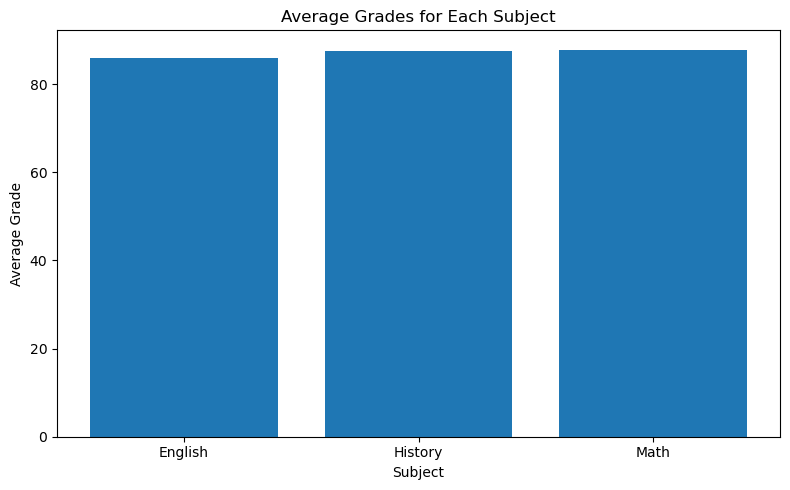

In [5]:
#5
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('student_grades.db')
cursor = conn.cursor()

students_df = pd.read_sql_query("SELECT * FROM students", conn)
grades_df = pd.read_sql_query("SELECT * FROM grades", conn)

combined_df = pd.read_sql_query("""
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM students
JOIN grades ON students.student_id = grades.student_id
""", conn)

avg_grades_student_df = combined_df.groupby(['first_name', 'last_name']).mean(numeric_only=True).reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_grades_student_df['first_name'] + ' ' + avg_grades_student_df['last_name'], avg_grades_student_df['grade'])
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

avg_grades_subject_df = combined_df.groupby('subject').mean(numeric_only=True).reset_index()

plt.figure(figsize=(8, 5))
plt.bar(avg_grades_subject_df['subject'], avg_grades_subject_df['grade'])
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Subject')
plt.tight_layout()
plt.show()

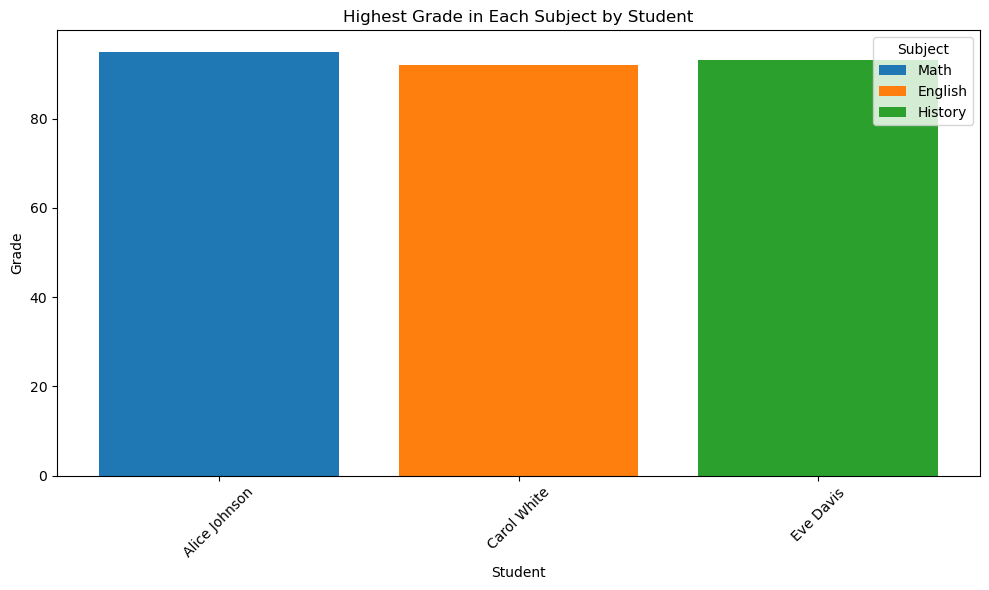

In [6]:
#Bonus Points
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
conn = sqlite3.connect('student_grades.db')
cursor = conn.cursor()
highest_grade_per_subject_query = """
SELECT students.first_name, students.last_name, grades.subject, grades.grade
FROM grades
JOIN students ON students.student_id = grades.student_id
WHERE (subject, grade) IN (
    SELECT subject, MAX(grade) 
    FROM grades 
    GROUP BY subject
);
"""
cursor.execute(highest_grade_per_subject_query)
highest_grade_result = cursor.fetchall()

highest_grade_df = pd.DataFrame(highest_grade_result, columns=['first_name', 'last_name', 'subject', 'grade'])

plt.figure(figsize=(10, 6))
subjects = highest_grade_df['subject'].unique()

for subject in subjects:
    student_data = highest_grade_df[highest_grade_df['subject'] == subject]
    plt.bar(student_data['first_name'] + ' ' + student_data['last_name'], student_data['grade'], label=subject)

plt.xlabel('Student')
plt.ylabel('Grade')
plt.title('Highest Grade in Each Subject by Student')
plt.legend(title="Subject")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

conn.close()
